In [14]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [2]:
sys.path.insert(0, r'../../src')
from function_cache import *

In [3]:
T_0min = pd.read_csv('../../data/processed/price_before_close/T_0min.csv', index_col='Trading_Day', parse_dates=True)
TF_0min = pd.read_csv('../../data/processed/price_before_close/TF_0min.csv', index_col='Trading_Day', parse_dates=True)
T_5min = pd.read_csv('../../data/processed/price_before_close/T_5min.csv', index_col='Trading_Day', parse_dates=True)
TF_5min = pd.read_csv('../../data/processed/price_before_close/TF_5min.csv', index_col='Trading_Day', parse_dates=True)
T_10min = pd.read_csv('../../data/processed/price_before_close/T_10min.csv', index_col='Trading_Day', parse_dates=True)
TF_10min = pd.read_csv('../../data/processed/price_before_close/TF_10min.csv', index_col='Trading_Day', parse_dates=True)
T_15min = pd.read_csv('../../data/processed/price_before_close/T_15min.csv', index_col='Trading_Day', parse_dates=True)
TF_15min = pd.read_csv('../../data/processed/price_before_close/TF_15min.csv', index_col='Trading_Day', parse_dates=True)

In [4]:
T_features = pd.read_csv('../../data/processed/candidate_features/T_features.csv', index_col=0)
TF_features = pd.read_csv('../../data/processed/candidate_features/TF_features.csv', index_col=0)
T_spread_change = pd.read_csv('../../data/processed/different_ys/T_spread_change.csv', index_col=0)
TF_spread_change = pd.read_csv('../../data/processed/different_ys/TF_spread_change.csv', index_col=0)

In [5]:
features = pd.concat([T_features, TF_features])
spread_change = pd.concat([T_spread_change, TF_spread_change])

In [6]:
X = features.values
y = spread_change['0min_0min'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
top_feat = ['-1d_corr_def_OI_spread', '10d_def_volume_exp_mva']

In [8]:
feat_idx = [list(features.columns).index(x) for x in top_feat]
feat_idx

[18, 25]

In [13]:
X2 = sm.add_constant(X[:, feat_idx])
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     5.948
Date:                Mon, 12 Aug 2019   Prob (F-statistic):            0.00586
Time:                        10:23:19   Log-Likelihood:                 2.7311
No. Observations:                  39   AIC:                            0.5377
Df Residuals:                      36   BIC:                             5.528
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.038      2.276      0.0

In [10]:
y_pred = est2.predict(X2)

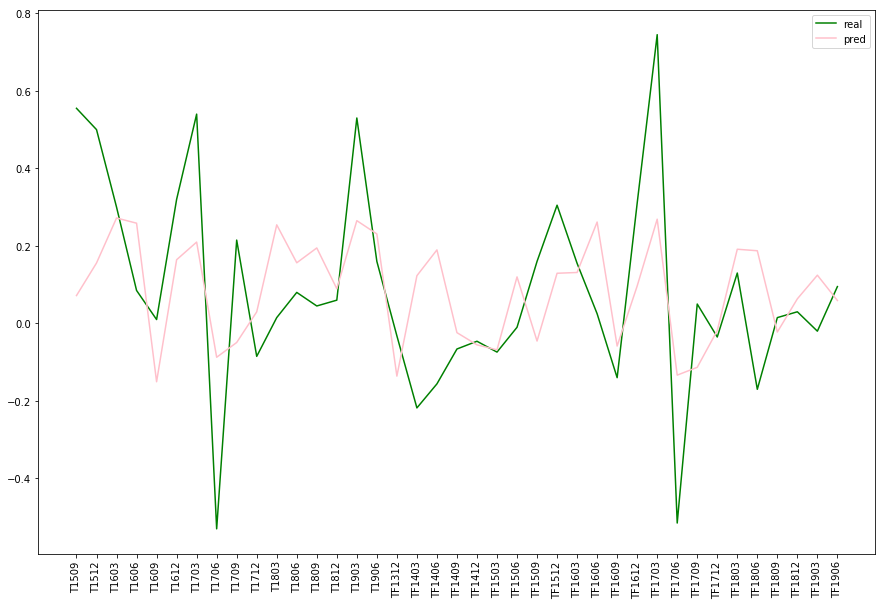

In [11]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(spread_change.index, y, c='g', label='real')
plt.plot(spread_change.index, y_pred, c='pink', label='pred')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

In [15]:
reg = LinearRegression()
reg.fit(X, y)
FI_sr = pd.Series(np.abs(reg.coef_), features.columns)

In [16]:
FI_sr

5d_spread_change                  0.041121
10d_spread_change                 0.162136
15d_spread_change                 0.234909
20d_spread_change                 0.002372
10d_act_price_exp_mva             0.044430
-1d_corr_act_price_def_OI         0.356947
-1d_corr_def_price_def_OI         0.115710
10d_spread_std_divided_by_std     0.171061
10d_current_price                 0.019901
1d_z_diff_act_price_def_price     0.088265
-1d_corr_act_price_def_volume     0.440846
-1d_corr_def_price_def_volume     0.396585
10d_current_spread                0.056479
-1d_std                           0.091498
-1d_corr_act_price_def_price      0.005816
-1d_corr_act_OI_def_volume        0.257218
-1d_corr_act_OI_def_OI            0.132144
-1d_corr_def_volume_def_OI        0.162084
-1d_corr_def_OI_spread            0.259477
-1d_corr_def_volume_spread        0.333928
1d_z_diff_act_price_def_OI        0.226819
-1d_corr_act_volume_def_volume    0.304628
-1d_corr_act_volume_def_OI        0.325797
-1d_corr_ac

In [17]:
FI_sr.to_csv('Linear_Reg.csv', header=True)